In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

crashdata = pd.read_csv("drive/My Drive/CPE 695 Final Project/Motor_Vehicle_Collisions_-_Crashes_Cleaned2.csv") # Using Cleaned data for faster loading time
crashdata.tail()

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
1048562,12/31/2019,18:41,BRONX,10466,40.893680,-73.85724,NaN,NaN,0,0.0,Driver Inattention/Distraction,Unspecified,4272549.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
1048563,12/31/2019,4:10,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,0,0.0,Unsafe Speed,NaN,4266987.0,Sedan,NaN
1048564,12/31/2019,6:15,QUEENS,11434,40.678240,-73.77110,130 AVENUE,BEDELL STREET,1,0.0,Unspecified,NaN,4266868.0,Sedan,NaN
1048565,12/31/2019,7:30,BROOKLYN,11207,40.663925,-73.89961,SNEDIKER AVENUE,LIVONIA AVENUE,0,0.0,Unspecified,NaN,4266997.0,Sedan,NaN
1048566,12/31/2019,19:18,NaN,NaN,40.669403,-73.94221,EASTERN PARKWAY,NaN,0,0.0,Passing or Lane Usage Improper,Driver Inattention/Distraction,4267378.0,Sedan,Station Wagon/Sport Utility Vehicle


In [2]:
# COPY OF CRASH DATA
cd_proc=crashdata
cd_proc.shape

(1048567, 15)

In [3]:
# DROP NaN ROWS BESIDES CONTRIBUTING FACTOR VEHICLE 2 AND VEHICLE TYPE CODE 2
cd_proc.drop(['COLLISION_ID' ], axis = 'columns', inplace=True) #DROP COLISION ID COLUMN
cd_proc.dropna(subset=['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME','NUMBER OF PERSONS INJURED',	'NUMBER OF PERSONS KILLED', 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1'], inplace=True) # Drop NaN data from these columns
cd_proc.columns = cd_proc.columns.str.replace(' ', '_') #replace space in colmun names with _

# Process all string names to be uppercase and replace spaces with _
cd_proc = cd_proc.applymap(lambda s:s.upper()  if type(s) == str else s)
cd_proc = cd_proc.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)

cd_proc.head()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2
0,01/01/2016,5:46,QUEENS,11417,40.675038,-73.845229,133_AVENUE______________________,SITKA_STREET____________________,0,0.0,UNSPECIFIED,UNSPECIFIED,PASSENGER_VEHICLE,UNKNOWN
1,01/01/2016,14:30,BROOKLYN,11209,40.627011,-74.032556,RIDGE_BOULEVARD_________________,82_STREET_______________________,1,0.0,UNSPECIFIED,UNSPECIFIED,LIVERY_VEHICLE,BICYCLE
2,01/01/2016,6:10,MANHATTAN,10026,40.803116,-73.956320,8_AVENUE________________________,WEST_114_STREET_________________,1,0.0,FATIGUED/DROWSY,UNSPECIFIED,PASSENGER_VEHICLE,PASSENGER_VEHICLE
3,01/01/2016,16:08,BRONX,10457,40.847563,-73.894733,MONTEREY_AVENUE_________________,EAST_178_STREET_________________,0,0.0,UNSPECIFIED,UNSPECIFIED,PASSENGER_VEHICLE,UNKNOWN
6,01/01/2016,14:28,BROOKLYN,11215,40.659252,-73.988430,7_AVENUE________________________,20_STREET_______________________,0,0.0,DRIVER_INEXPERIENCE,UNSPECIFIED,PASSENGER_VEHICLE,UNKNOWN


In [4]:
# DELETE EXTRA SPACES IN STREET NAMES
cd_proc['ON_STREET_NAME'] = cd_proc['ON_STREET_NAME'].apply(lambda x: x.replace('_', ''))
cd_proc['CROSS_STREET_NAME'] = cd_proc['CROSS_STREET_NAME'].apply(lambda x: x.replace('_', ''))
cd_proc.head()


,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2
0,01/01/2016,5:46,QUEENS,11417,40.675038,-73.845229,133AVENUE,SITKASTREET,0,0.0,UNSPECIFIED,UNSPECIFIED,PASSENGER_VEHICLE,UNKNOWN
1,01/01/2016,14:30,BROOKLYN,11209,40.627011,-74.032556,RIDGEBOULEVARD,82STREET,1,0.0,UNSPECIFIED,UNSPECIFIED,LIVERY_VEHICLE,BICYCLE
2,01/01/2016,6:10,MANHATTAN,10026,40.803116,-73.956320,8AVENUE,WEST114STREET,1,0.0,FATIGUED/DROWSY,UNSPECIFIED,PASSENGER_VEHICLE,PASSENGER_VEHICLE
3,01/01/2016,16:08,BRONX,10457,40.847563,-73.894733,MONTEREYAVENUE,EAST178STREET,0,0.0,UNSPECIFIED,UNSPECIFIED,PASSENGER_VEHICLE,UNKNOWN
6,01/01/2016,14:28,BROOKLYN,11215,40.659252,-73.988430,7AVENUE,20STREET,0,0.0,DRIVER_INEXPERIENCE,UNSPECIFIED,PASSENGER_VEHICLE,UNKNOWN


In [5]:
print(len(cd_proc['VEHICLE_TYPE_CODE_1'].unique().tolist()))
cd_proc.shape

442


(447867, 14)

In [6]:
# GROUPING TOGETHER ALL OF THE VEHICLE TYPES IN A MORE UNIFORM WAY
cd_proc.VEHICLE_TYPE_CODE_1.replace(['4_DR_SEDAN','2_DR_SEDAN', '3-DOOR'], 'SEDAN', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['4_DR_SEDAN','2_DR_SEDAN', '3-DOOR'], 'SEDAN', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['STATION_WAGON/SPORT_UTILITY_VEHICLE','SPORT_UTILITY_/_STATION_WAGON'], 'SUV', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['STATION_WAGON/SPORT_UTILITY_VEHICLE','SPORT_UTILITY_/_STATION_WAGON'], 'SUV', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['FDNY_EMS', 'FDNY_AMBUL','AMBULETTE', 'AMBU', 'AMBUL', 'AMB', 'AMULANCE'], 'AMBULANCE', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['FDNY_EMS', 'FDNY_AMBUL', 'AMBULETTE', 'AMBU', 'AMBUL', 'AMB', 'AMULANCE'], 'AMBULANCE', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['FDNY_ENGINE','NYC_F''FIRE', 'FDNY', 'FIRET', 'FDNY_TRUCK', 'FIRETRUCK', 'FDNY_FIRE', 'FIRE_ENGIN'], 'FIRE_TRUCK', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['FDNY_ENGINE', 'NYC_F', 'FIRE', 'FDNY', 'FIRET', 'FDNY_TRUCK', 'FIRETRUCK', 'FDNY_FIRE', 'FIRE_ENGIN'], 'FIRE_TRUCK', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['SKATEBOARD', 'BICYCLE', 'E-BIKE', 'E-BIK', 'E_BIK', 'E_BIKE', 'EBIKE'], 'BIKE', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['SKATEBOARD', 'BICYCLE', 'E-BIKE', 'E-BIK', 'E_BIK', 'E_BIKE' 'EBIKE'], 'BIKE', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['MOTOR', 'DIRTB', 'DIRT_B', 'MOTORBIKE', 'MINIBIKE'], 'MOTORCYCLE', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['MOTOR', 'DIRTB', 'DIRT_B', 'MOTORBIKE', 'MINIBIKE'], 'MOTORCYCLE', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['MOPD','MINICYCLE','E-SCOOTER', 'SCOO', 'E_SCO', 'MOPED', 'MOPAD', 'MOTORSCOOTER', 'SCOOT', 'E-SCO', 'SCOOTER'], 'E_SCOOTER', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['MOPD', 'MINICYCLE','E-SCOOTER', 'SCOO', 'E_SCO', 'MOPED', 'MOPAD', 'MOTORSCOOTER', 'SCOOT', 'E-SCO', 'SCOOTER'], 'E_SCOOTER', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['TRACTOR_TR', 'TRACTOR-TR','TRLR','TRACTOR_TRUCK_DIESEL', 'LARGE_COM_VEH(6_OR_MORE_TIRES)', 'TRACTOR_TRUCK_GASOLINE', 'TRAIL', 'TRACT','TRAILER', 'TRL', 'TRAC', 'SEMI', 'FLAT_RACK' ], 'TRACTOR_TRUCK', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['TRACTOR_TR', 'TRACTOR-TR','TRLR','TRACTOR_TRUCK_DIESEL', 'LARGE_COM_VEH(6_OR_MORE_TIRES)', 'TRACTOR_TRUCK_GASOLINE', 'TRAIL', 'TRACT','TRAILER', 'TRL', 'TRAC', 'SEMI', 'FLAT_RACK' ], 'TRACTOR_TRUCK', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['DELIVERY','DELV', 'BOX_TRUCK','BOX_T', 'SMALL_COM_VEH(4_TIRES)_', 'REFRIGERATED_VAN', 'BEVERAGE_TRUCK', 'USPS', 'DELIV', 'COMME', 'COM', 'DELV', 'POSTA', 'US_PO', 'REFG', 'MAIL', 'FOOD', 'WHITE', 'UHAUL', 'UHAU'], 'SMALL_COM_VEH', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['DELIVERY', 'DELV', 'BOX_TRUCK', 'BOX_T', 'SMALL_COM_VEH(4_TIRES)_', 'REFRIGERATED_VAN', 'BEVERAGE_TRUCK', 'USPS', 'DELIV', 'COMME', 'COM', 'DELV', 'POSTA', 'US_PO', 'REFG', 'MAIL', 'FOOD', 'WHITE', 'UHAUL', 'UHAU'], 'SMALL_COM_VEH', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['SCHOO', 'SCHOOLBUS', 'YELLO'], 'SCHOOL_BUS', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['SCHOO', 'SCHOOLBUS', 'YELLO'], 'SCHOOL_BUS', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['LIVERY_VEHICLE'], 'TAXI', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['LIVERY_VEHICLE'], 'TAXI', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['TOWE_TRCUK', 'FLATBED', 'FLAT', 'TOW_TRUCK_/_WRECKER', 'TOW_T', 'TOW', 'FLATB'], 'TOW_TRUCK', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['TOWE_TRCUK', 'FLATBED', 'FLAT', 'TOW_TRUCK_/_WRECKER', 'TOW_T','TOW', 'FLATB'], 'TOW_TRUCK', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['PICKU', 'LADDE', 'PICK', 'PICK-UP_TRUCK', 'STAKE_OR_RACK', 'PICK_UP_TR', 'PICK-', 'PICK-UP'], 'PICKUP_TRUCK', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['PICKU', 'LADDE', 'PICK', 'PICK-UP_TRUCK', 'STAKE_OR_RACK', 'PICK_UP_TR', 'PICK-', 'PICK-UP'], 'PICKUP_TRUCK', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['MTA_B'], 'BUS', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['MTA_B'], 'BUS', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['DUMPS', 'GARBAGE_TR', 'GARBA', 'GARBAGE_OR_REFUSE'], 'GARBAGE_TRUCK', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['DUMPS', 'GARBAGE_TR', 'GARBA', 'GARBAGE_OR_REFUSE'], 'GARBAGE_TRUCK', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['BACKH','ESCAV','LIFT_BOOM','DUMP', 'CONCRETE_MIXER','FORKL', 'FORK', 'CONST', 'CEMEN', 'HOPPER', 'CRANE','BOBCA', 'WELL_DRILLER', 'FORK_LIFT', 'WORK', 'FORKLIFT', 'TANKE', 'BACK', 'BULLD'], 'CONSTRUCTION_VEHIC', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['BACKH','ESCAV','LIFT_BOOM','DUMP', 'CONCRETE_MIXER','FORKL', 'FORK', 'CONST', 'CEMEN', 'HOPPER', 'CRANE','BOBCA', 'WELL_DRILLER', 'FORK_LIFT', 'WORK', 'FORKLIFT', 'TANKE', 'BACK', 'BULLD'], 'CONSTRUCTION_VEHIC', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['PICKUP_WITH_MOUNTED_CAMPER', 'MOTORIZED_HOME', 'VAN_CAMPER'], 'RV', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['PICKUP_WITH_MOUNTED_CAMPER', 'MOTORIZED_HOME', 'VAN_CAMPER'], 'RV', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['UNK', 'OTHER', 'UNKOWN', 'UNKNO', 'UNKOW', 'UNKNOWN'], 'UNKOWN_OTHER', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['UNK', 'OTHER', 'UNKOWN', 'UNKNO', 'UNKOW', 'UNKNOWN'], 'UNKOWN_OTHER', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['UTIL', 'UTILI', 'UTILITY.'], 'UTILITY', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['UTIL', 'UTILI', 'UTILITY.'], 'UTILITY', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['SNOW_PLOW'], 'PLOW', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['SNOW_PLOW',], 'PLOW', inplace=True)

cd_proc.VEHICLE_TYPE_CODE_1.replace(['GOLF_CART', '', '',], 'GOLF', inplace=True)
cd_proc.VEHICLE_TYPE_CODE_2.replace(['GOLF_CART', '',], 'GOLF', inplace=True)

In [7]:
print(len(cd_proc['VEHICLE_TYPE_CODE_1'].unique().tolist()))
cd_proc.shape

335


(447867, 14)

In [8]:
#PRINT QUANTITY OF EACH VEHICLE TYPE
pd.set_option('display.max_rows', None)
vehic1 = cd_proc.VEHICLE_TYPE_CODE_1.value_counts()
vehic2 = cd_proc.VEHICLE_TYPE_CODE_2.value_counts()

fact1 = cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1.value_counts()
fact2 = cd_proc.CONTRIBUTING_FACTOR_VEHICLE_2.value_counts()

print(vehic1)

SEDAN                                     176038
SUV                                       145207
PASSENGER_VEHICLE                          42710
TAXI                                       23633
PICKUP_TRUCK                               11366
SMALL_COM_VEH                               8690
BUS                                         8456
VAN                                         5801
UNKOWN_OTHER                                5403
BIKE                                        4707
TRACTOR_TRUCK                               4369
MOTORCYCLE                                  2373
AMBULANCE                                   1474
CONSTRUCTION_VEHIC                          1319
CONVERTIBLE                                 1010
E_SCOOTER                                    669
PK                                           668
CARRY_ALL                                    667
GARBAGE_TRUCK                                583
FLAT_BED                                     560
TOW_TRUCK           

In [9]:
print(len(cd_proc['VEHICLE_TYPE_CODE_1'].unique().tolist()))
cd_proc.shape

335


(447867, 14)

In [10]:
#Drop all vehicle types wih less than 66 instances
lastVehic = False
for vehic in vehic1.index:
  if lastVehic == True:
    # Get names of indexes for which column Age has value 30
    indexNames = cd_proc[ cd_proc['VEHICLE_TYPE_CODE_1'] == vehic ].index
    # Delete these row indexes from dataFrame
    cd_proc.drop(indexNames , inplace=True)
  elif vehic == 'PLOW':
    lastVehic = True

for vehic in vehic2.index:
  if lastVehic == True:
    # Get names of indexes for which column Age has value 30
    indexNames = cd_proc[ cd_proc['VEHICLE_TYPE_CODE_2'] == vehic ].index
    # Delete these row indexes from dataFrame
    cd_proc.drop(indexNames , inplace=True)
  elif vehic == 'PLOW':
    lastVehic = True

cd_proc = cd_proc[cd_proc.VEHICLE_TYPE_CODE_1 != 'UNKNOWN_OTHER ']

In [11]:
print(len(cd_proc['VEHICLE_TYPE_CODE_2'].unique().tolist()))
cd_proc.shape

1


(78273, 14)

In [12]:
#PRINT QUANTITY OF EACH Contributing Factor
pd.set_option('display.max_rows', None)

fact1 = cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1.value_counts()
fact2 = cd_proc.CONTRIBUTING_FACTOR_VEHICLE_2.value_counts()

print(fact1)

UNSPECIFIED                                              34010
DRIVER_INATTENTION/DISTRACTION                           14063
FAILURE_TO_YIELD_RIGHT-OF-WAY                             8472
PASSING_TOO_CLOSELY                                       2564
PASSING_OR_LANE_USAGE_IMPROPER                            2130
BACKING_UNSAFELY                                          2055
OTHER_VEHICULAR                                           1913
FOLLOWING_TOO_CLOSELY                                     1534
PEDESTRIAN/BICYCLIST/OTHER_PEDESTRIAN_ERROR/CONFUSION     1043
TURNING_IMPROPERLY                                         995
TRAFFIC_CONTROL_DISREGARDED                                990
UNSAFE_SPEED                                               915
DRIVER_INEXPERIENCE                                        798
ALCOHOL_INVOLVEMENT                                        740
REACTION_TO_UNINVOLVED_VEHICLE                             645
VIEW_OBSTRUCTED/LIMITED                                

In [13]:
#clean up contributing factors
cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1.replace(['80', '1', '0'], 'UNSPECIFIED', inplace=True)
cd_proc.CONTRIBUTING_FACTOR_VEHICLE_2.replace(['80', '1', '0'], 'UNSPECIFIED', inplace=True)

cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1.replace(['DRUGS_(ILLEGAL)', 'ALCOHOL_INVOLVEMENT'], 'DRUGS', inplace=True)
cd_proc.CONTRIBUTING_FACTOR_VEHICLE_2.replace(['DRUGS_(ILLEGAL)', 'ALCOHOL_INVOLVEMENT'], 'DRUGS', inplace=True)

cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1.replace(['TEXTING', 'USING_ON_BOARD_NAVIGATION_DEVICE ', 'CELL_PHONE_(HAND-HELD)', 'CELL_PHONE_(HANDS-FREE)', 'OUTSIDE_CAR_DISTRACTION', 'EATING_OR_DRINKING', 'LISTENING/USING_HEADPHONES', 'CELL_PHONE', 'PASSENGER_DISTRACTION', 'OTHER_ELECTRONIC_DEVICE', 'LISTENING/USING_HEADPHONES'], 'DRIVER_INATTENTION/DISTRACTION', inplace=True)
cd_proc.CONTRIBUTING_FACTOR_VEHICLE_2.replace(['TEXTING','USING_ON_BOARD_NAVIGATION_DEVICE ', 'CELL_PHONE_(HAND-HELD)', 'CELL_PHONE_(HANDS-FREE)', 'OUTSIDE_CAR_DISTRACTION', 'EATING_OR_DRINKING', 'LISTENING/USING_HEADPHONES', 'CELL_PHONE', 'PASSENGER_DISTRACTION', 'OTHER_ELECTRONIC_DEVICE', 'LISTENING/USING_HEADPHONES'], 'DRIVER_INATTENTION/DISTRACTION', inplace=True)

cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1.replace(['FELL_ASLEEP'], 'LOST_CONSCIOUSNESS', inplace=True)
cd_proc.CONTRIBUTING_FACTOR_VEHICLE_2.replace(['FELL_ASLEEP'], 'LOST_CONSCIOUSNESS', inplace=True)

cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1.replace(['REACTION_TO_OTHER_UNINVOLVED_VEHICLE'], 'REACTION_TO_UNINVOLVED_VEHICLE', inplace=True)
cd_proc.CONTRIBUTING_FACTOR_VEHICLE_2.replace(['REACTION_TO_OTHER_UNINVOLVED_VEHICLE'], 'REACTION_TO_UNINVOLVED_VEHICLE', inplace=True)

In [14]:
#DELETE UNSPECIFIED CONTRIBUTING FACTOR VEHICLE 1 ROWS
cd_proc = cd_proc[cd_proc.CONTRIBUTING_FACTOR_VEHICLE_1 != 'UNSPECIFIED']

In [15]:
#Combine injured and death in one column
cd_proc['NUMBER_OF_PERSONS_INJURED'] = (cd_proc['NUMBER_OF_PERSONS_INJURED'].astype(float) + cd_proc['NUMBER_OF_PERSONS_KILLED'])
cd_proc.rename(columns={'NUMBER_OF_PERSONS_INJURED': 'NUMBER_OF_INJURED_OR_KILLED'}, inplace=True)
cd_proc.drop(['NUMBER_OF_PERSONS_KILLED'],axis='columns', inplace=True)
cd_proc.head()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_INJURED_OR_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2
15,01/01/2016,1:25,STATEN_ISLAND,10314,40.621666,-74.120080,MARTLINGAVENUE,BROOKSIDEAVENUE,2.0,DRUGS,NaN,PASSENGER_VEHICLE,NaN
38,01/01/2016,0:50,QUEENS,11417,40.681385,-73.847475,ROCKAWAYBOULEVARD,92STREET,1.0,FAILURE_TO_YIELD_RIGHT-OF-WAY,NaN,PASSENGER_VEHICLE,NaN
40,01/01/2016,11:10,QUEENS,11370,40.763053,-73.886730,82STREET,25AVENUE,0.0,DRUGS,NaN,UNKOWN_OTHER,NaN
86,01/01/2016,14:14,STATEN_ISLAND,10306,40.578630,-74.115424,RICHMONDROAD,BRYANTAVENUE,0.0,TRAFFIC_CONTROL_DISREGARDED,NaN,PASSENGER_VEHICLE,NaN
162,01/01/2016,21:12,MANHATTAN,10025,40.792185,-73.968017,WEST95STREET,COLUMBUSAVENUE,1.0,DRIVER_INATTENTION/DISTRACTION,NaN,TAXI,NaN


In [16]:
#Loading the Weather Data
#WEATHER DATES MUST MATCH WITH CRASH DATES
weatherdata = pd.read_csv("drive/My Drive/CPE 695 Final Project/weatherData.csv") #Already deleted all the extra columns in excel
weatherdata.head()

,STATION,DATE,AWND,PRCP,SNOW,TMAX,TMIN,TSUN,WT01,WT02,WT03,WT04,WT06,WT08
0,USW00094728,2016-01-01,7.61,0.0,0.0,42,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,2016-01-02,6.71,0.0,0.0,40,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,2016-01-03,7.83,0.0,0.0,45,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094728,2016-01-04,8.50,0.0,0.0,36,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,2016-01-05,5.14,0.0,0.0,29,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#CONVERT CRASH TIME TO HOUR AND MINUTE OF THE DAY
from datetime import datetime as dt
cd_proc['CRASH_TIME'] =  pd.to_datetime( cd_proc['CRASH_TIME'], infer_datetime_format=True)
minutes =cd_proc.CRASH_TIME.dt.minute
minutes= minutes/60;
cd_proc['CRASH_TIME'] = (cd_proc.CRASH_TIME.dt.hour + minutes)

#Combining the two datasets
#if dates match, copy data from weather row to the end of the crash row

cd_proc['CRASH_DATE'] =  pd.to_datetime( cd_proc['CRASH_DATE'], infer_datetime_format=True) #converts the date into pandas datetime, so it can be compared
weatherdata['DATE'] =  pd.to_datetime(weatherdata['DATE'], infer_datetime_format=True)

#Merges the two datas if they have the same date
merged=cd_proc.set_index(cd_proc.CRASH_DATE.dt.date).join(weatherdata.set_index('DATE')).reset_index(drop=True)

merged.drop(['CRASH_DATE', 'STATION', 'TSUN', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08'], axis='columns', inplace=True)  #potentially drop the year and only keep day-month
merged.dropna(subset=['AWND','PRCP', 'SNOW', 'TMAX', 'TMIN', 'LATITUDE', 'LONGITUDE', 'CRASH_TIME'], inplace=True) #drop if not available
merged.head()

,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_INJURED_OR_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,AWND,PRCP,SNOW,TMAX,TMIN
2694,1.416667,STATEN_ISLAND,10314,40.621666,-74.120080,MARTLINGAVENUE,BROOKSIDEAVENUE,2.0,DRUGS,NaN,PASSENGER_VEHICLE,NaN,7.61,0.0,0.0,42.0,34.0
2695,0.833333,QUEENS,11417,40.681385,-73.847475,ROCKAWAYBOULEVARD,92STREET,1.0,FAILURE_TO_YIELD_RIGHT-OF-WAY,NaN,PASSENGER_VEHICLE,NaN,7.61,0.0,0.0,42.0,34.0
2696,11.166667,QUEENS,11370,40.763053,-73.886730,82STREET,25AVENUE,0.0,DRUGS,NaN,UNKOWN_OTHER,NaN,7.61,0.0,0.0,42.0,34.0
2697,14.233333,STATEN_ISLAND,10306,40.578630,-74.115424,RICHMONDROAD,BRYANTAVENUE,0.0,TRAFFIC_CONTROL_DISREGARDED,NaN,PASSENGER_VEHICLE,NaN,7.61,0.0,0.0,42.0,34.0
2698,21.200000,MANHATTAN,10025,40.792185,-73.968017,WEST95STREET,COLUMBUSAVENUE,1.0,DRIVER_INATTENTION/DISTRACTION,NaN,TAXI,NaN,7.61,0.0,0.0,42.0,34.0


In [18]:
# ENCODE ALL CATEGORICAL DATA
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))
            
    return df

merged = handle_non_numerical_data(merged)
merged.head()

,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_INJURED_OR_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,AWND,PRCP,SNOW,TMAX,TMIN
2694,1.416667,3,24,40.621666,-74.120080,1277,206,2.0,26,0,19,0,7.61,0.0,0.0,42.0,34.0
2695,0.833333,2,211,40.681385,-73.847475,2587,3529,1.0,9,0,19,0,7.61,0.0,0.0,42.0,34.0
2696,11.166667,2,192,40.763053,-73.886730,1965,2186,0.0,26,0,8,0,7.61,0.0,0.0,42.0,34.0
2697,14.233333,3,17,40.578630,-74.115424,2236,743,0.0,16,0,19,0,7.61,0.0,0.0,42.0,34.0
2698,21.200000,1,316,40.792185,-73.968017,3157,1339,1.0,21,0,3,0,7.61,0.0,0.0,42.0,34.0


In [19]:
# SEPARATING TARGET COLUMN FROM INPUTS
target = merged.NUMBER_OF_INJURED_OR_KILLED  #what we want to predict
inputs = merged.drop('NUMBER_OF_INJURED_OR_KILLED', axis='columns')  #input columns
inputs.head()

,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,CROSS_STREET_NAME,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,AWND,PRCP,SNOW,TMAX,TMIN
2694,1.416667,3,24,40.621666,-74.120080,1277,206,26,0,19,0,7.61,0.0,0.0,42.0,34.0
2695,0.833333,2,211,40.681385,-73.847475,2587,3529,9,0,19,0,7.61,0.0,0.0,42.0,34.0
2696,11.166667,2,192,40.763053,-73.886730,1965,2186,26,0,8,0,7.61,0.0,0.0,42.0,34.0
2697,14.233333,3,17,40.578630,-74.115424,2236,743,16,0,19,0,7.61,0.0,0.0,42.0,34.0
2698,21.200000,1,316,40.792185,-73.968017,3157,1339,21,0,3,0,7.61,0.0,0.0,42.0,34.0


Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 10 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


explained variance ratio: [5.62104609e-01 4.33729147e-01 4.02200300e-03 6.37957241e-05
 5.40068097e-05 2.56738699e-05 7.03919946e-07 2.95272211e-08
 2.56294282e-08 5.13635668e-09 6.58147741e-10]


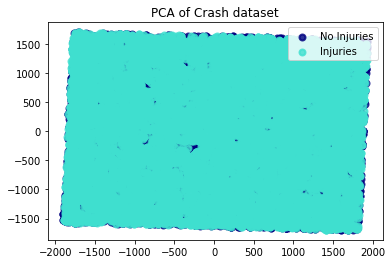

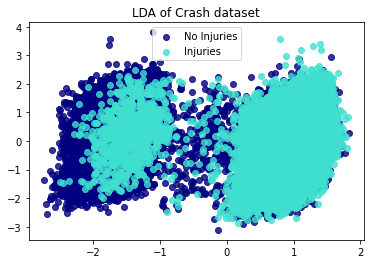

In [22]:
# PCA AND LDA
# USE TO DETERMINE BEST INPUT COLUMNS TO KEEP

#https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py
print(__doc__)

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_coms = len(inputs.columns)
X = inputs
y = target
target_names = ['No Injuries', "Injuries"]

pca = PCA(n_components=num_coms)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=num_coms)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Crash dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Crash dataset')

plt.show()

In [ ]:
n_pcs =  num_coms
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = inputs.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
#print(X_r)

print(df)

       0                              1
0    PC0              CROSS_STREET_NAME
1    PC1                 ON_STREET_NAME
2    PC2                       ZIP_CODE
3    PC3                           TMAX
4    PC4  CONTRIBUTING_FACTOR_VEHICLE_1
5    PC5  CONTRIBUTING_FACTOR_VEHICLE_2
6    PC6            VEHICLE_TYPE_CODE_1
7    PC7                     CRASH_TIME
8    PC8                           TMIN
9    PC9                      LONGITUDE
10  PC10                           AWND
11  PC11                        BOROUGH
12  PC12                           SNOW
13  PC13                           PRCP
14  PC14                       LATITUDE
15  PC15            VEHICLE_TYPE_CODE_2


In [20]:
copy_inputs= inputs

In [21]:
inputs = copy_inputs #used for testing purposes, so i dont have to reload whole notebook
#Normalize ONLY the numeric columns
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
inputs[['CRASH_TIME',  'LATITUDE', 'LONGITUDE', 'AWND', 'PRCP', 'SNOW', 'TMIN', 'TMAX']] = mms.fit_transform(inputs[['LATITUDE', 'LONGITUDE', 'AWND', 'PRCP', 'SNOW', 'TMIN', 'CRASH_TIME', 'TMAX']])
inputs.head()


##################################################
##################################################
#########DROP UNIMPORTANT COLUMS HERE#############
##################################################

#drop each column and see what combo performs best
inputs.drop(['VEHICLE_TYPE_CODE_2', 'LATITUDE', 'PRCP', 'SNOW', 'AWND'], axis = 'columns', inplace=True)  # DROP (SNOW AND PRCP), or (SNOW AND TMAX)  BEST COMBO SO FAR)

In [23]:
#TRAIN, TEST, SPLIT AND NORMALIZATION 
from sklearn.model_selection import train_test_split

# Split training and testing data 80% and 20% randomly respectively
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=.2)

In [24]:
#Neural Network Training
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [25]:
#converts prediction value to 1 if the value of the injuries/deaths is greater then 0
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

In [26]:
from sklearn.metrics import confusion_matrix

#In sample (using training data)
y_pred = mlp.predict(x_train) #predicitions from training set
y_pred = (y_pred > 0).astype(int) #predicting
tn, fp, fn, tp = confusion_matrix(y_train_binary, y_pred).ravel() # gives true negative, false positive, false negative, and true positive

print('In Sample')
print(' ')
print('True Positives Rate: ', tp/(tp + fn))
print('True Negatives Rate: ', tn/(tn + fp))
in_sample_accuracy = ((tn+tp)/(tn+tp+fn+fp)) #accuracy from confusion matrix
print('Accuracy: ', in_sample_accuracy)    # accuracy with training set
print(' ')
#Out of sample (using testing data)
y_pred2 = mlp.predict(x_test) #predicitions from testing set
y_pred2 = (y_pred2 > 0).astype(int)
tn2, fp2, fn2, tp2 =confusion_matrix(y_test_binary, y_pred2).ravel() # gives true negative, false positive, false negative, and true positive
print('Out of Sample')
print(' ')
print('True Positives Rate: ', tp2/(tp2 + fn2))
print('True Negatives Rate: ', tn2/(tn2 + fp2))
out_sample_accuracy = ((tn2+tp2)/(tn2+tp2+fn2+fp2))  #
print('Accuracy: ', out_sample_accuracy)    # accuracy with test set

In Sample
 
True Positives Rate:  0.8654925982644206
True Negatives Rate:  0.7117691723614274
Accuracy:  0.7842641630556892
 
Out of Sample
 
True Positives Rate:  0.8591925258591925
True Negatives Rate:  0.721483771251932
Accuracy:  0.7877086007702182


In [ ]:
# DRAW THE NEURAL NETWORK
import VisualizeNN as VisNN # FROM https://github.com/jzliu-100/visualize-neural-network/blob/master/VisualizeNN.py


network=VisNN.DrawNN([12, 8, 8, 8, 22]) # NN STRUCTURE including input and output layers
network.draw()

ModuleNotFoundError: ignored

In [ ]:
# NEURAL NETWORK WITH WEIGHTS SHOWN
weights = mlp.coefs_ 
network=VisNN.DrawNN([12, 8, 8, 8, 22], weights) # NN STRUCTURE including input and output layers
network.draw()

In [ ]:
#Find the max number of injuries/deaths, so categories can be made
y_train.max()

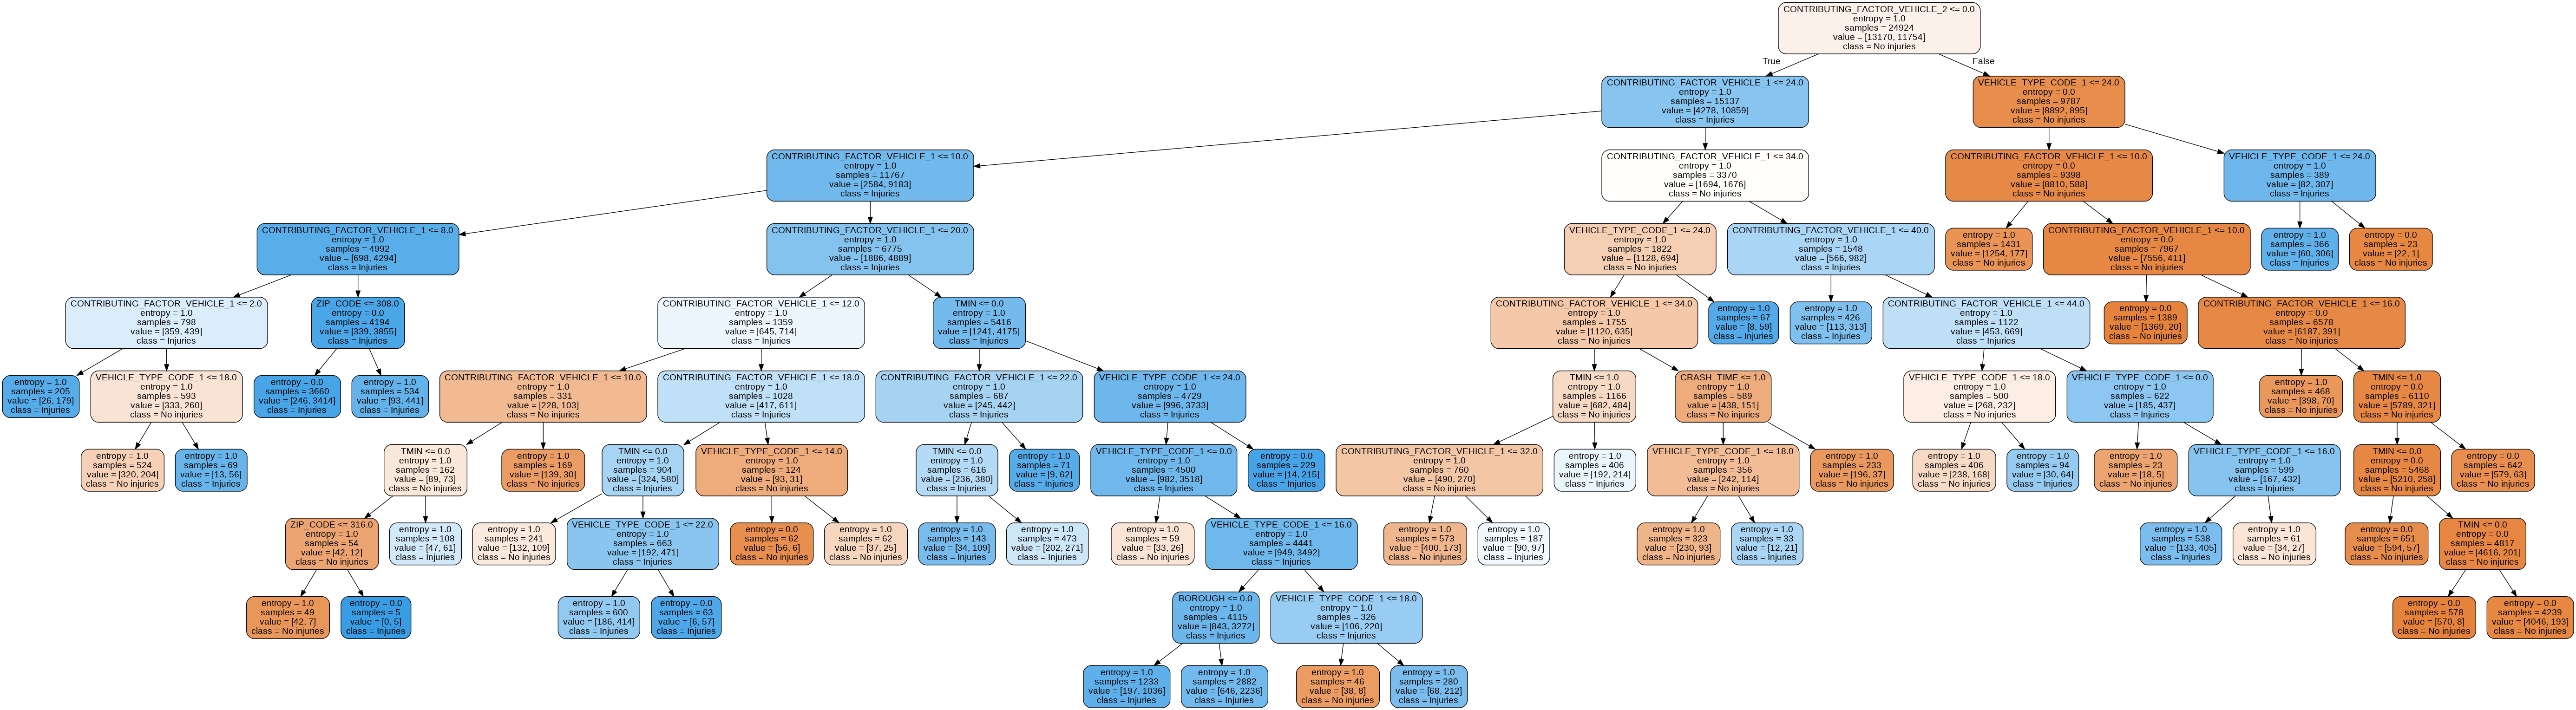

In [27]:
# Fit decision tree
# Use y_train_binary 

from sklearn import tree # Tree Library

tree = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=45) #Alter parameters to optimize tree
tree = tree.fit(x_train, y_train_binary) # Fit the decision tree

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names = inputs.columns, rounded = True, proportion = False, precision = 0, filled = True)
export_graphviz(tree, out_file='tree.dot', feature_names = inputs.columns, class_names=['No injuries', 'Injuries'], rounded = True, proportion = False, precision = 0, filled = True)
!dot -Tpng tree.dot -o tree.png 
from IPython.display import Image   #display decision tree
Image(filename = 'tree.png')  #saves image as tree.png


In [28]:
#In sample (using training data)
y_pred = tree.predict(x_train) #predicitions from training set
y_pred = (y_pred > 0).astype(int) #predicting
tn, fp, fn, tp = confusion_matrix(y_train_binary, y_pred).ravel() # gives true negative, false positive, false negative, and true positive

print('In Sample')
print(' ')
print('True Positives Rate: ', tp/(tp + fn))
print('True Negatives Rate: ', tn/(tn + fp))
in_sample_accuracy = ((tn+tp)/(tn+tp+fn+fp)) #accuracy from confusion matrix
print('Accuracy: ', in_sample_accuracy)    # accuracy with training set
print(' ')

#Out of sample (using testing data)
y_pred2 = tree.predict(x_test) #predicitions from testing set
y_pred2 = (y_pred2 > 0).astype(int)
tn2, fp2, fn2, tp2 =confusion_matrix(y_test_binary, y_pred2).ravel() # gives true negative, false positive, false negative, and true positive
print('Out of Sample')
print(' ')
print('True Positives Rate: ', tp2/(tp2 + fn2))
print('True Negatives Rate: ', tn2/(tn2 + fp2))
out_sample_accuracy = ((tn2+tp2)/(tn2+tp2+fn2+fp2))  #
print('Accuracy: ', out_sample_accuracy)    # accuracy with test set

In Sample
 
True Positives Rate:  0.8717883273779139
True Negatives Rate:  0.8158694001518603
Accuracy:  0.8422404108489809
 
Out of Sample
 
True Positives Rate:  0.8688688688688688
True Negatives Rate:  0.8176197836166924
Accuracy:  0.8422657252888318
